# Connect Intensive - Machine Learning Nanodegree

## Week 4. Neural Nets Mini-project

### Objectives    

- Understand the fundamentals of neural networks  
- Build simple perceptrons 
- Train a perceptron model with `scikit-learn` (Optional)

### Prerequisites   

 - You should have [numpy](http://www.scipy.org/scipylib/download.html) and [scikit-learn](http://scikit-learn.org) installed  
 - You should have some understanding of [Python classes and objects](https://docs.python.org/3/tutorial/classes.html). If you are not familar with these, here is an interactive [tutorial](https://www.learnpython.org/en/Classes_and_Objects).  

---

## Part I. Introduction to Neural Networks

An ["Artificial" Neural Network (ANN)](https://en.wikipedia.org/wiki/Artificial_neural_network) is a computing system made up of a number of simple, highly interconnected processing elements, which process information by their dynamic state response to external inputs. It is inspired by the way biological neural networks in the human brain. ANNs have generated a lot of excitement in the Machine Learning research and industry with great breakthroughs in the areas of speech recognition, computer vision, and natural language processing.  

Neural neworks are typically organized in layers. Layers are made up of a number of interconnected **"nodes"** which contain an **"activation function"**. Patterns are presented to the network via the **"input layer"**, which passes through one or more **"hidden layers"** to be processed. The hidden layers then connects to an **"output layer"** to give the outputs. The image below shows the first and the simplest neural network, the so-called [feedforward neural network](https://en.wikipedia.org/wiki/Feedforward_neural_network), wherein connections between the units do not form a cycle.  

<img src="./img/nn/nn.png" alt="Drawing" style="width: 500px;"/>

### Node (Single Neuron)   
The basic unit in a neural network is the neuron, often called a "node" or "unit". It receives input from some other nodes, or from an external source and computes the output. Each input has an associated *weight (w)*, which is assigned based on its relative importance to other inputs. The node applies a non-linear activation function to the weighted sum of its inputs, as follows, $$f(w_1*x_1 + w_2*x_2 + b)$$. 


### Activation Function 
The activation function takes a single number input and performs a certain mathematical operation. Some commonly used activation functions include:  

- [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function): taks a real-value input and gives a characteristic "S"-shaped curve with returned values between 0 and 1  
- Tanh: takes a real-valued input and gives output in the range [-1, 1] 
- [ReLu (**RE**ctified **L**inear **U**nit)](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)): takes a real-valued input and thresholds it at zero (replaces negative values with zero).   


### Perceptron  
[Perceptron](https://en.wikipedia.org/wiki/Perceptron) was invented in the 1950s and was one of the first artificial neural networks to be produced. 

- **Single Layer Perceptron** This is the simplest feedforward neural network and does not contain any hidden layer.  

- **Multi Layer Perceptron** A Multi Layer Perceptron has one or more hidden layers. It is more useful than Single Layer Perceptons in terms of practical applications.

In this notebook, we will be building both a Single Layer Percepton and a Multi Layer Percepton. 

---

## Part II. Build Perceptrons

### 1. Single Layer Perceptron  

A single Layer Perceptron maps a series of inputs to an output. Each input is assigned a certain weight and then some mapping is applied to determines the output of the perceptron.   

<img src="./img/NN/SL_perceptron.png" alt="Drawing" style="width: 500px;"/>

#### Build a simple perceptron  
We will compute the weights of the inputs by taking the dot product of the input vector and the weight vector. This number is also known as the strength or the activity of the inputs. We will use a simple step function to map to the perceptron output. The step function takes in the strength of the inputs and we will compare the strength to some predefined threshold value.

In [14]:
# ----------
# 
# In this exercise, you will add in code that decides whether a perceptron will fire based
# on the threshold.  
#
# ----------
import numpy as np

class Perceptron0(object):
    """
    This class models an artificial neuron with step activation function.
    """
    def __init__(self, weights = np.array([1]), threshold = 0):
        """
        Initialize weights and threshold based on input arguments. Note that no
        type-checking is being performed here for simplicity.
        """
        self.weights = weights
        self.threshold = threshold
    
    def activate(self, inputs):
        """
        Takes in 
        @param inputs, a list of numbers equal to length of weights.
        @return the output of a threshold perceptron with given inputs based on
        perceptron weights and threshold.
        """ 

        # TODO: calculate the strength with which the perceptron fires.
        strength = np.dot(inputs, self.weights)
        
        # TODO: return 0 or 1 based on the threshold
        return 1 if strength > self.threshold else 0

def test_0():
    """
    A few tests to make sure that the perceptron class performs as expected.
    Nothing should show up in the output if all the assertions pass.
    """
    p1 = Perceptron0(np.array([1, 2]), 0.)
    assert p1.activate(np.array([ 1, -1])) == 0 # <threshold -> 0
    assert p1.activate(np.array([-1,  1])) == 1 # >threshold -> 1
    assert p1.activate(np.array([ 2, -1])) == 0 # =threshold -> 0
    print(p1.weights)

test_0()


[1 2]


#### QUESTIONS: 


- Why do we use some threshold and step function rather than just outputting the weighted inputs (dot product)?  
> **Answer:**  threshold and step function gives a 1 or 0 value based on weighted inputs. The output is a certain value, A1, if the input sum is above a certain threshold and A0 if the input sum is below a certain threshold. The threshold and step function introduces the non-linearity which turns our perceptron into a something that can model interesting functions


- What parameter is learnable in a perceptron, i.e., what can be modified to allow the perceptron to model an arbitrary function?   
> **Answer:** The weights are adjustable or "learnable"


- What does the input to a network of perceptrons look like? 

    A) Tensor of weights  
    B) Matrix of numerical values  
    C) Matrix of classifcations  
    D) Matrix of numerical values and classifications for each row.    
> **Answer:**  A


- Are Neural Networks used for classification or regression?   
> **Answer:** Classification



#### Perceptron update rule 

The update rule for perceptron is as follows:  

$$ w(t + 1) = w(t) + (\eta * (y_i - \hat{y_i}(t)) * x_i $$


In [15]:
# ----------
#
# In this exercise, you will update the perceptron class so that it can update
# its weights.
#
# Finish writing the update() method so that it updates the weights according
# to the perceptron update rule. Updates should be performed online, revising
# the weights after each data point.
# 
# ----------


class Perceptron1(Perceptron0):
    """
    This class models an artificial neuron with step activation function.
    """

    def __init__(self, *args):
        """
        Initialize weights and threshold based on input arguments. Note that no
        type-checking is being performed here for simplicity.
        """
        super(Perceptron1, self).__init__(*args)


    def update(self, X, y, eta=.1):
        """
        Takes in 
        @param X, a 2D array consisting of a LIST of inputs and 
        @param y, a 1D array consisting of a corresponding list of expected
        outputs. Updates internal weights according to the perceptron training
        rule using these values and 
        @param eta, an optional learning rate.
        """

         # YOUR CODE HERE
        # TODO: for each data point...
        for row in range(X.shape[0]):
           
            # TODO: obtain the prediction for that point
            predictions = self.activate(X[row])
            
            # TODO: update self.weights based on prediction accuracy, learning
            self.weights = self.weights + eta*((y[row]-predictions)*X[row])
               
        
            
def test_p1():
    """
    A few tests to make sure that the perceptron class performs as expected.
    Nothing should show up in the output if all the assertions pass.
    """
    def sum_almost_equal(array1, array2, tol = 1e-6):
        return sum(abs(array1 - array2)) < tol

    p1 = Perceptron1(np.array([1, 1, 1]), 0)
    p1.update(np.array([[2, 0, -3]]), np.array([1]))
    print(p1.weights)
    assert sum_almost_equal(p1.weights, np.array([1.2, 1, 0.7]))

    p2 = Perceptron1(np.array([1, 2, 3]), 0)
    p2.update(np.array([[3, 2, 1], [4, 0, -1]]), np.array([0, 0]))
    print(p2.weights)
    assert sum_almost_equal(p2.weights, np.array([0.7, 1.8, 2.9]))

    p3 = Perceptron1(np.array([3, 0, 2]),0)
    p3.update(np.array([[2, -2, 4],[-1, -3, 2], [0, 2, 1]]), np.array([0, 1, 0]))
    print(p3.weights)
    assert sum_almost_equal(p3.weights, np.array([2.7, -0.3, 1.7]))
    return True

test_p1()

[1.2 1.  0.7]
[0.7 1.8 2.9]
[ 2.7 -0.3  1.7]


True

### 2. Multi Layer Perceptron 

The simple single node perceptron can only separate the data linearly. Multi Layer Perceptron is more useful in practice. This class of networks consists of multiple layers of computational units. Each neuron in one layer has directed connections to the neurons of the subsequent layer. In many applications the units of these networks apply a sigmoid or a reLU function as an activation function, but we will continue to use the step function we used earlier.

<img src="./img/NN/Q_multilayer.png" alt="Drawing" style="width: 500px;"/>

We define a matrix of weights for each layer and apply the activation function for each unit in the layer to calculate the output to the next layer. For the example shown above, there will be one weight matrix (2x3) applied to the inputs for input layer (3x1), followed by activation function. To calculate the effect of the second layer, we take the activations from the first layer and apply a second weight matrix (1x2) and the activation function to get the final out (1x1).

#### QUESTION: 

Given weights for the hidden layer [1, 1, -5] and [3, -4, 2], and weights for the output layer [2, -1], what will the network output if inputs are [1, 2, 3] (as shown by the figure above)? 

**Answer:**  
You can try this by hand, use numpy or use the Perceptron0 class we defined above.

In [16]:
# Middle (hidden) layer hastwo perceptrons, each with three inputs and 1 output
def activate(act):
    for row in range(act.shape[0]):
        strength = act[row][0]
        act[row][0] = 1 if strength > 0 else 0
    return act

A = np.array([1, 1, -5, 3, -4, 2]).reshape(2, 3)
inputs = np.array([1, 2, 3]).reshape(1, 3)
activations = activate(np.dot(A, inputs.transpose()))

B = np.array([2, -1]).reshape(1, 2)
output = activate(np.dot(B, activations)).ravel()

print("The final output should be {}".format(activate(np.dot(B, activations)).ravel()[0]))
# refer to https://discussions.udacity.com/t/quiz-layered-network-example/183194/24

The final output should be 0


#### Build an XOR network  

**The XOR (exclusive OR) problem** is a problem that can be described with the logic table below, and visualised in input space: 

<img src="./img/NN/XOR.png" alt="Drawing" style="width: 500px;"/>

A two-layer neural network is capable of calculating XOR. The numbers within the neurons represent each neuron's explicit threshold (which can be factored out so that all neurons have the same threshold, usually 1). The numbers that annotate arrows represent the weight of the inputs. This net assumes that if the threshold is not reached, zero (not -1) is output.   
In this example, let's build a network capable of modeling XOR funtion. The weights and thresholds are given below.  

<img src="./img/NN/Q_XOR.png" alt="Drawing" style="width: 500px;"/>

In [17]:
# ----------
#
# In this exercise, you will create a network of perceptrons that can represent
# the XOR function based on the network above.
#
# You will need to create a network of perceptrons with the correct weights,
# and define a procedure EvalNetwork() which takes in a list of inputs and
# outputs the value of this network.
#
# ----------


# Step 1: Set up the perceptron network
# Use the Peceptron0 class we defined earlier. You will need two instances, one for each "layer"
Network = [
    # TODO: input layer, declare input layer perceptrons here
    [Perceptron0(np.array([2, -1]), 1.5),
     Perceptron0(np.array([-1, 2]), 1.5)],
    # TODO: output node, declare output layer perceptron here
    [Perceptron0(np.array([2, 2]), 1)]
]

# Step 2: Define a procedure to compute the output of the network, given inputs
def EvalNetwork(inputValues, Network):
    """
    Takes in 
    @param inputValues, a list of input values, and 
    @param Network, specifies a perceptron network. 
    @return the output of the Network for the given set of inputs.
    """
    
    # YOUR CODE HERE
    # TODO: calculate the OutputValue
    innerlayer, outputlayer = Network
    interim_results = np.zeros(len(innerlayer))
    for i, p in enumerate(innerlayer):
        interim_results[i] = p.activate(inputValues)
    
    return outputlayer[0].activate(np.array(interim_results))

def test_xor():
    """
    A few tests to make sure that the perceptron class performs as expected.
    """
    EvalNetwork(np.array([0, 0]), Network) # 0 XOR 0 = 0 
    EvalNetwork(np.array([0, 1]), Network) # 0 XOR 1 = 1 
    EvalNetwork(np.array([1, 0]), Network) # 1 XOR 0 = 1 
    EvalNetwork(np.array([1, 1]), Network) # 1 XOR 1 = 0 
    
test_xor()

---

## Part III. Perceptron with Scikit-Learn

In [18]:
# import libraries
from sklearn.linear_model import perceptron
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
# make up some data
data = pd.DataFrame.from_items([
    ('Mass',   [10.0, 20.0, 4.6, 15.0, 2.0, 3.0, 3.0, 10.0, 15.0, 5.0]), 
    ('Length', [6.0,  5.0,  4.0, 4.4, 5.0, 4.5, 6.0, 7.0,  8.0,  9.0]),
    ('Class',  [0, 0, 1, 1, 1, 1, 0, 0, 0, 0])])
data.head(10)

,Mass,Length,Class
0,10.0,6.0,0
1,20.0,5.0,0
2,4.6,4.0,1
3,15.0,4.4,1
4,2.0,5.0,1
5,3.0,4.5,1
6,3.0,6.0,0
7,10.0,7.0,0
8,15.0,8.0,0
9,5.0,9.0,0


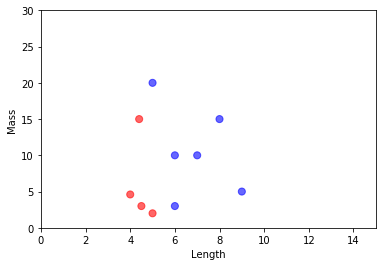

In [20]:
# TODO: plot data using Length as x-axis and Mass as y-axis 
# and use color to distinguish two classes

class_colors = np.array(['b', 'r'])
plt.scatter(x=data.Length, y=data.Mass, c=class_colors[data.Class], alpha=0.6, s=50)
plt.ylabel('Mass')
plt.xlabel('Length')
plt.ylim([0, 30])
plt.xlim([0, 15]);

In [21]:
# train a perceptron model 
# Create perceptron object 
p = perceptron.Perceptron(n_iter=1000, verbose=0,
                          random_state=42, fit_intercept=True, eta0=0.001)

# Train the perceptron object 
p.fit(data[['Length', 'Mass']], data['Class'])

# Print the weights and bias
weights = p.coef_
bias = p.intercept_
print ("weights = " + str(weights))
print ("bias = " + str(bias))

weights = [[-0.0148 -0.001 ]]
bias = [0.088]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [22]:
# make prediction for new data (length 11 and mass 12)
prediction = p.predict([[11, 12]])
print(prediction)

[0]


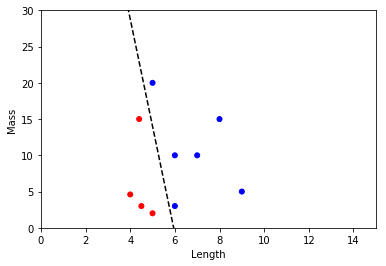

In [23]:
# TODO: plot decision boundary for the training data
x_s = np.linspace(0, 15, 100) # an array of x_s
y_s = - (x_s * weights[0][0] + bias) / weights[0][1]

plt.scatter(data.Length, data.Mass, c=class_colors[data.Class], s=25)
plt.plot(x_s, y_s, 'k--') # the decision boundary
plt.ylabel('Mass')
plt.xlabel('Length')
plt.ylim([0, 30])
plt.xlim([0, 15]);
